# How to contruct dot array system  

## 0. Import relevant packages and QuDiPy modules

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())

# update base working directory to QuDiPy
if path.stem != 'QuDiPy':
    base_dir = path.parents[1]
    os.chdir(base_dir)
else:
    base_dir = path

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qudipy.system import DotArray
from qudipy.utils import constants

## 1. Generate Dots object instance


### 1.1 Define variables to initialize Dots object instance

Define a parent directory to look for or to save data.

In [3]:
nav_dir = os.path.join('QuDiPy data', 'tutorials')

Define the directory to <span style="background-color: Khaki;">store 2D potential slice data</span> extracted from nextnano simulations for a given device, as well as, to  <span style="background-color: Khaki;">store calculated variables</span> such as $g$-factor deviation, exchange, or Hubbard parameters for individual dots or dot pairs.

In [4]:
processed_dir = os.path.join(base_dir, nav_dir,
                            'processed','2QD_processed')

Define the directory location that contains all of the nextnano simulation  <span style="background-color: Khaki;">data files to be processed or imported</span>.

In [5]:
nextnano_dir = os.path.join(base_dir, nav_dir,
                                    'nextnano','2QD_dotsep_60nm')

Define the anticipated number of quantum dots. This variable will determine if dot merger events occur under various voltage configurations.

In [6]:
n_dots = 2

If desired, define control parameters to use when interpolating the potential data from nextnano: must be a subset of the raw data or the full set of raw data. If not specified, the default is to interpolate over all raw data.

> **Note**: These will greatly influence the accuracy of the resultant calculations as well as the run time of the `Dots()` class upon initial data processing.

In [7]:
eff_interp_dims = [4,3,4]
ctrl_vals = [np.linspace(0.2, 0.4, eff_interp_dims[0]),
    np.linspace(-0.1, 0.12, eff_interp_dims[1]),
    np.linspace(0.2, 0.4, eff_interp_dims[2])]

Add a file prefix name to be appended to saved data or interpolation objects that will be computed.

In [8]:
file_prefix = 'tutorial'

### 1.2 Create object instance 

First, instantiate a `DotArray()` class object instance using the previously defined variables and choose to calculate the effective parameters ($g$-factor deviation and exchange), or choose just to collect the masked potential interpolation objects.

- The `save=` flag determines if processed nextnano potential data is saved to hard disk (default is `True`). If existing 
processed data exists it will be loaded from hard disk.
- The `calc=` flag determines which effective parameters to calculated or load from hard disk (default is `['spin']`). 
Calculations are ignored if flag is set to `[]` or `False`.

Now let's calculate the effective parameters and/or load the masked potential 
landscapes, as well as, save 2D potential slices to Pre-processed directory.

In [9]:
# Example 1: Process/Load/Calculate with default settings e.g. minimal input parameters.
dots = DotArray(n_dots)
dots.numeric(processed_dir, nextnano_dir)

Loading pre-calculated spin interpolators from
/home/zach/Documents/github/QuDiPy/QuDiPy data/tutorials/processed/2QD_processed/no_name_spin_data_size_[6 6 6]_from_[ 0.2 -0.1  0.2]_to_[0.45 0.15 0.45].pkl


In [10]:
# Example 2: Process/Load/Calculate with subset of raw nextnano data and desire file prefix
# to add to saved interpolator files.
dots = DotArray(n_dots, ctrl_ranges=ctrl_vals)
dots.numeric(processed_dir, nextnano_dir, file_prefix)

Loading pre-calculated spin interpolators from
/home/zach/Documents/github/QuDiPy/QuDiPy data/tutorials/processed/2QD_processed/tutorial_spin_data_size_[4 3 4]_from_[ 0.2 -0.1  0.2]_to_[0.4  0.12 0.4 ].pkl


## 1.3 Test dot splitting

The splitting procedure creates a list of new Dots objects. 
They inherit all properties from the parent object _except_:
1. potential interpolator
`dots_object.potential(ctrl_vals)` now outputs masked potential
2. the positions of visible dots __*(counted from 1)*__ may change.

Splitting group can be either `'single'`/`'singles'` (default) for individual dots, 
or `'pair'`/`'pairs'` for adjacent pairs.


> **Note**: if the number of quantum dots decreases for any control value coordinates, then the potential landscape returns `NaN`s, since the quantum dot system must be dot invariant for the present applications. 

> `NaN`s are not displayed when plotting

In [11]:
# Choose voltage control values
voltage_config = [0.2,0.,0.2]

# Quantum dots are not well defined in this case, so NaNs are outputted and 
# are not plotted
# Example voltage configuration:
# voltage_config = [0.2,0.,0.4]

dot1, dot2 = dots.split(group='single')
dotpair1 = dots.split(group='pair')

All Dots objects have the ability to plot the ground state wavefunction
either:

1) Overlayed on the potential

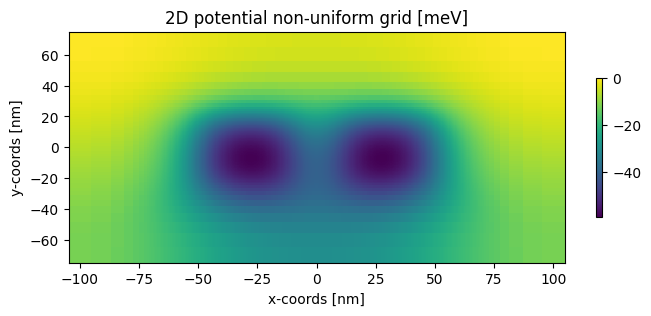

In [12]:
dots.potential.plot([0.2,0.,0.2])

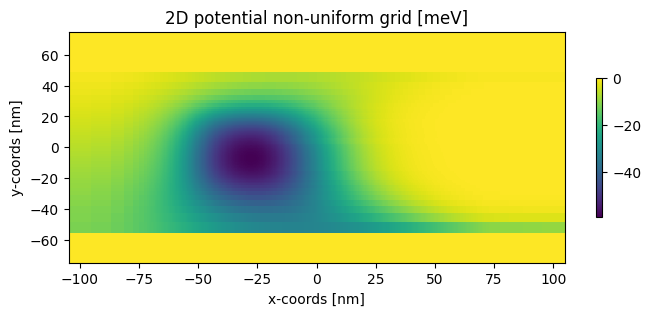

In [13]:
dot1.potential.plot(voltage_config, plot_units='meV')

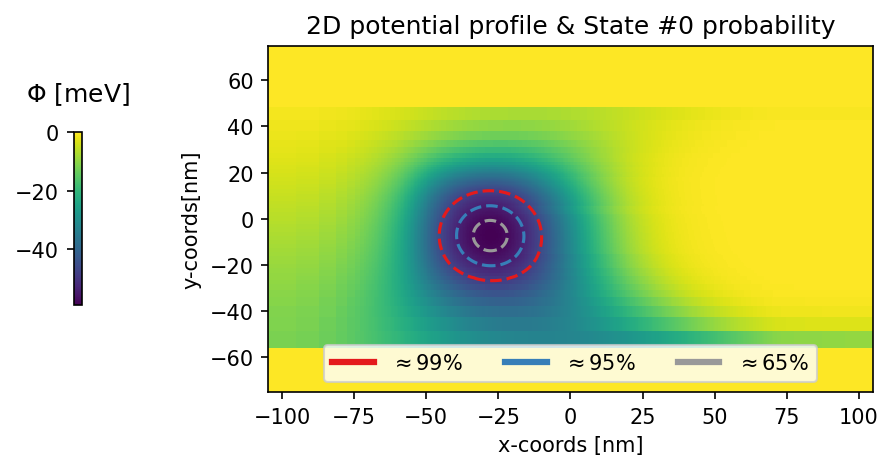

In [14]:
dot1.potential.plot(voltage_config, plot_units='meV', show_wf=True)

2) In a separate subplot figure

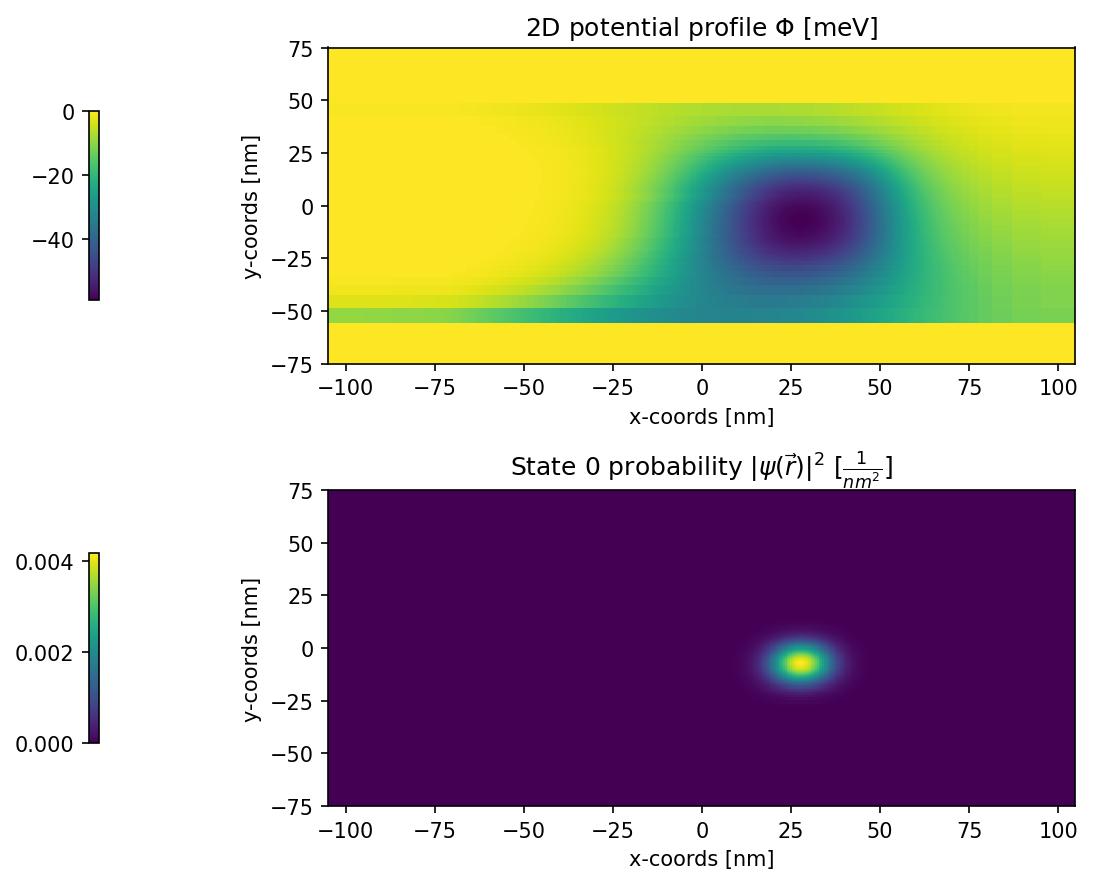

In [15]:
dot2.potential.plot(voltage_config, plot_units='meV', show_wf=True, overlay_ontop=False)

All Dots objects preserve information about the unmasked potential.
They can also be split more than once.

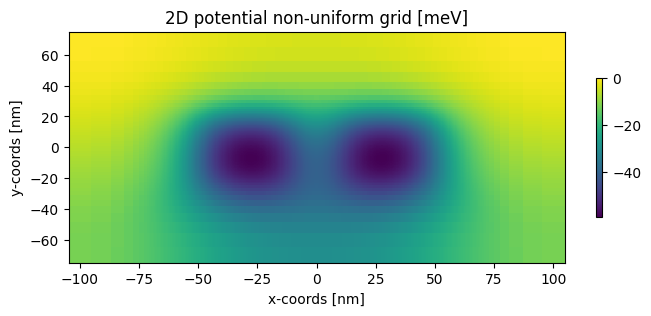

In [16]:
dots.potential.plot(voltage_config, plot_units='meV')

# Try splitting dot1 again
# ddot1, = dot1.split()
# ddot1.potential.plot(voltage_config)

## 1.4 Evaluate effective parameters

For a specific control voltage configuration, the $g$-factor deviations and exchange couplings are determined for each dot or neighboring pair, respectively.

### 1.4.1 g-factor deviation

g-factor deviation for a single voltage vector

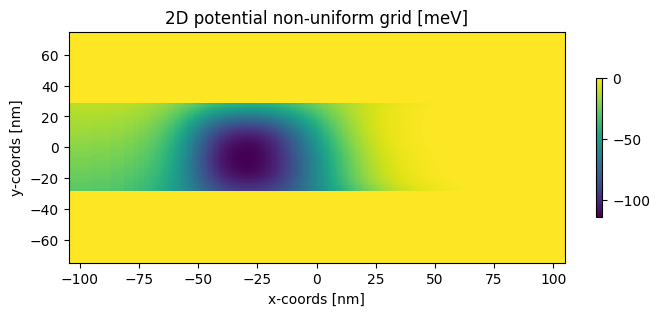

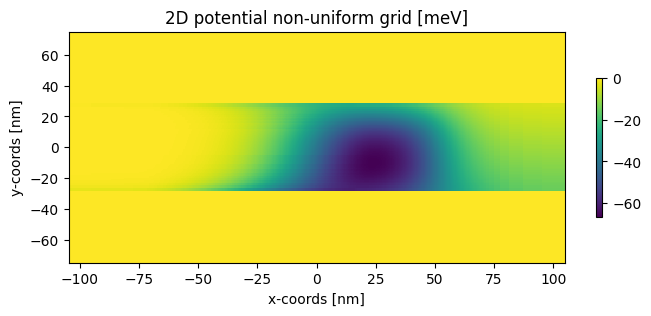

In [17]:
voltage_config = [0.4, 0.0, 0.2]

dot1, dot2 = dots.split(group='single')
dotpair1 = dots.split(group='pair')

dot1.potential.plot(voltage_config)
dot2.potential.plot(voltage_config)

In [18]:
# higher voltage on the 2nd dot gives higher g-factor deviation
# voltage_config = [0.4, 0.0, 0.2]

print('Exact values:\t',    dots.g_factors(voltage_config, exact=True))
print('Interpolated:\t',    dots.g_factors(voltage_config, exact=False))

g_factor evaluation: control vector=[0.4, 0.0, 0.2]: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]
Exact values:	 [5.08641118e-05 8.89635328e-06]
Interpolated:	 [5.18060050e-05 9.51262098e-06]


g-factor deviation for multiple voltage vectors

g_factor evaluation: control vector=[0.4, 0.1, 0.2]:  83%|████████▎ | 5/6 [00:07<00:01,  1.54s/it]                Warning: number of detected dots is 1 -> different from user-specified value 2. Parameters are not evaluated
g_factor evaluation: control vector=[0.4, 0.1, 0.2]: 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]


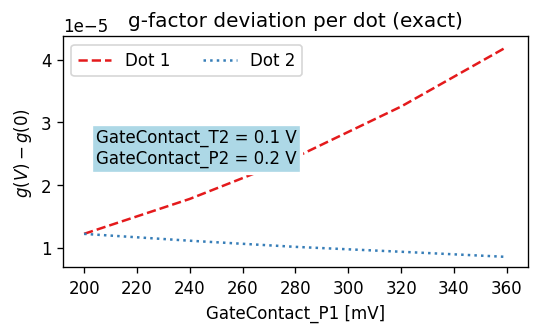

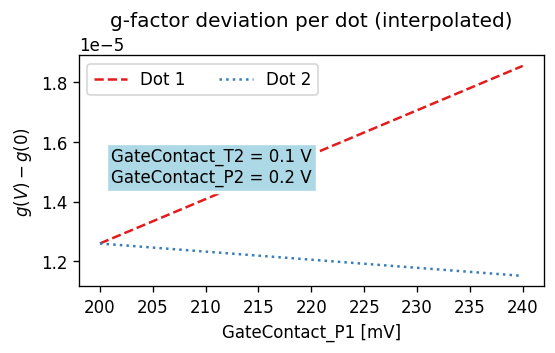

In [19]:
voltage_configs = []
v = np.linspace(0.2, 0.4, 6)
for volt in v:
    voltage_configs.append([volt,0.1,0.2])
    
dots.plot(voltage_configs, param='gfactor', exact=True)
dots.plot(voltage_configs, param='gfactor')

### 1.4.2 Hund-Mulliken or Heitler-London Exchange

Exchange for a single voltage vector

In [20]:
# HM values are typically larger than HL
ex_hl = dots.exchanges(voltage_config, method='hl')
ex_hm = dots.exchanges(voltage_config, method='hm')

# convert values to neV
print(ex_hl)
print(f'HL exchange: \t {ex_hl[0] / 1.6e-28:.5} neV')
print(f'HM exchange: \t {ex_hm[0] /  1.6e-28:.5} neV')

[4.56952543e-38]
HL exchange: 	 2.856e-10 neV
HM exchange: 	 4.4385e-10 neV


Exchange for multiple voltage vectors: plotting exchange for a path through voltage state space

Exchange HM evaluation: control vector=[0.2, 0.1, 0.2]: 100%|██████████| 20/20 [00:00<00:00, 25.26it/s]                


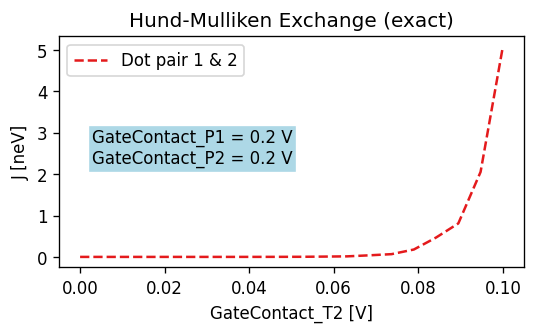

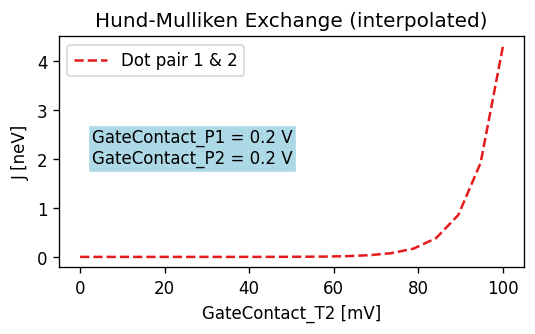

In [21]:
voltage_configs = []
v = np.linspace(0,0.1,20)
for volt in v:
    voltage_configs.append([0.2, volt, 0.2])

dots.plot(voltage_configs, param='hm', yscale='linear', plot_units='neV', axis_units='V', exact=True)
dots.plot(voltage_configs, param='hm', yscale='linear', plot_units='neV', axis_units='mV')